In [32]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter


settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = True
settings.RW_do_params = False
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "BRD4apo1_test"

import cProfile
import pstats

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py


Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.510
Experiment name test_full0.5 al

In [33]:
import mdtraj as md

In [34]:
### add code to read in sequence from CIF file instead of copying it manually

cif_file = "raw_data/BRD4/BRD4_APO/AF-O60885-F1-model_v4.cif"

sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
sequence = ""
seq_head_idx = 0
with open(cif_file, 'r') as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        if sequence_header in line:
            seq_head_idx = idx+1
            break
    
    for idx, line in enumerate(lines[seq_head_idx:]):
        if idx > 0 and line[0] == ";":
            break
        sequence += line.strip()


# print(sequence)



# strip sequence of non letters
sequence = ''.join([i for i in sequence if i.isalpha()])

print(sequence)

print("Sequence length: ", len(sequence))


MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPPPPETSNPNKPKRQTNQLQYLLRVVLKTLWKHQFAWPFQQPVDAVKLNLPDYYKIIKTPMDMGTIKKRLENNYYWNAQECIQDFNTMFTNCYIYNKPGDDIVLMAEALEKLFLQKINELPTEETEIMIVQAKGRGRGRKETGTAKPGVSTVPNTTQASTPPQTQTPQPNPPPVQATPHPFPAVTPDLIVQTPVMTVVPPQPLQTPPPVPPQPQPPPAPAPQPVQSHPPIIAATPQPVKTKKGVKRKADTTTPTTIDPIHEPPSLPPEPKTTKLGQRRESSRPVKPPKKDVPDSQQHPAPEKSSKVSEQLKCCSGILKEMFAKKHAAYAWPFYKPVDVEALGLHDYCDIIKHPMDMSTIKSKLEAREYRDAQEFGADVRLMFSNCYKYNPPDHEVVAMARKLQDVFEMRFAKMPDEPEEPVVAVSSPAVPPPTKVVAPPSSSDSSSDSSSDSDSSTDDSEEERAQRLAELQEQLKAVHEQLAALSQPQQNKPKKKEKDKKEKKKEKHKRKEEVEENKKSKAKEPPPKKTKKNNSSNSNVSKKEPAPMKSKPPPTYESEEEDKCKPMSYEEKRQLSLDINKLPGEKLGRVVHIIQSREPSLKNSNPDEIEIDFETLKPSTLRELERYVTSCLRKKRKPQAEKVDVIAGSSKMKGFSSSESESSSESSSSDSEDSETEMAPKSKKKGHPGREQKKHHHHHHQQMQQAPAPVPQQPPPPPQQPPPPPPPQQQQQPPPPPPPPSMPQQAAPAMKSSPPPFIATQVPVLEPQLPGSVFDPIGHFTQPILHLPQPELPPHLPQPPEHSTPPHLNQHAVVSPPALHNALPQQPSRPSNRAAALPPKPARPPAVSPALTQTPLLPQPPMAQPPQVLLEDEEPPAPPLTSMQMQLYLQQLQKVQPPTPLLPSVKVQSQPPPPLPPPPHPSVQQQLQQQPPPPPPPQPQPPPQQQHQPPPRPVHLQ

In [35]:
# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     print(f"Writing sequence to {file_name}")
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [36]:
# # fasta_path = os.path.join("raw_data", "BRD4", 'BRD4_APO.fasta')
# write_fasta(sequence, 'LXRa', fasta_path)


In [37]:
# raw_hdx_path = "raw_data/BRD4/BRD4_APO/ELN55049_AllResultsTables_Curated.csv"
# raw_hdx = pd.read_csv(raw_hdx_path)
# raw_hdx.head()

In [38]:
# # convert FD in DeutTime to -1
# raw_hdx["Exposure"] = raw_hdx["DeutTime"].replace('FD', -1)

# # remove 's' from Deuteration Time
# raw_hdx["Exposure"] = raw_hdx["Exposure"].str.replace('s', '').astype(float)

# # replace NaN with -1
# raw_hdx["Exposure"].fillna(-1, inplace=True)

# raw_hdx.head()

In [39]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(raw_hdx.loc[raw_hdx["Exposure"] == 0]["Uptake"])

In [40]:
# print(raw_hdx.loc[raw_hdx["Exposure"] == 0].Uptake.value_counts(dropna=False))

# # fill NaNs with 0
# raw_hdx["Uptake"].fillna(0, inplace=True)

In [41]:
# # group by Start and End to extract peptide using ngroup
# raw_hdx["Peptide"] = raw_hdx.groupby(["Start", "End"]).ngroup()

# raw_hdx.head()



In [42]:
# # average Uptake for each peptide and Exposure
# hdx = raw_hdx.groupby(["Start","End","Peptide", "Exposure"])["Uptake"].mean().reset_index()

# print(hdx)

In [43]:
# # select Exposure -1
# max_uptake = hdx.loc[hdx["Exposure"] == -1]["Uptake"].values

# print(max_uptake)

# no_exposure_times = hdx["Exposure"].unique()
# print(len(no_exposure_times))

# # extend max_uptake to all Exposure times (each elemetn should be repeated len(no_exposure_times) times) ie [[m]*no_exposure_times for m in max_uptake]
# max_uptake = [m for m in max_uptake for _ in range(len(no_exposure_times))]
# print(max_uptake)


# # add max_uptake to hdx
# hdx["MaxUptake"] = max_uptake


In [44]:
# print(hdx)

In [45]:
# hdx['UptakeFraction'] = hdx['Uptake'] / hdx['MaxUptake']

# hdx.head()

In [46]:
# # remove Exposure -1
# hdx = hdx.loc[hdx["Exposure"] != -1]

# hdx.head()

In [47]:

# # pivot exposure and uptake fraction
# hdx = hdx.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

# print(hdx)




In [48]:
# # clamp UptakeFraction to 1
# hdx["UptakeFraction"] = hdx["UptakeFraction"].clip(upper=1)
# print(hdx)


In [49]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # pivot so that exposure time is the column name drop the exposure column
# hdx = hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# # change Start to ResStr and End to ResEnd
# hdx = hdx.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [50]:
# print(hdx)


In [51]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "BRD4", 'BRD4_APO.dat'), sep=' ', index=False)


In [52]:
# segs = raw_hdx[['Start', 'End']].drop_duplicates().sort_values(by=['Start', 'End']).reset_index(drop=True)


In [53]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [54]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "BRD4", 'BRD4_APO_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [55]:
# from pdbfixer import PDBFixer
# from openmm.app import PDBFile

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/BRD4/BRD4_APO"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [56]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO"

    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    os.listdir(BPTI_dir)

    segs_name = "BRD4_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "BRD4_APO.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)
    sim_name = 'BRD4_AF'

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]
    print(pdb_list)

    top_path = "/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO_484_protonated.pdb"
    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print("top",top_path)


    # print(pdb_paths)

    # small_traj_path = top_path.replace(".pdb","_small.xtc")
    # # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path, pdb_paths)

    # print(small_traj_path)
        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #         W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO_484_protonated.xtc"]
    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [57]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/BRD4_APO.dat
['BRD4_apo_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_004_alphafold2_ptm_model_4_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_005_alphafold2_ptm_model_3_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_001_alphafold2_ptm_model_2_seed_000.pdb']
['BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_004_alphafold2_ptm_model_4_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_005_alphafold2_ptm_model_3_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_001_alphafold2_ptm_model_2_seed_000_H.pdb']
['/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO_484_protonated.xtc']


In [58]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [59]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [60]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [61]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [0.0, 15.0, 60.0, 600.0, 3600.0, 14400.0]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py


Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S12
Experimen

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

Residue predictions complete

Residue predictions complete

Path /home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/out__train_BRD4apo1_test_1Segment_average_fractions.dat
AVG: ncol = 8, len(names) = 6
Experimental BRD4apo1_test True 1
/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/train_BRD4apo1_test_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1
/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/out__train_BRD4apo1_test_1Intrinsic_rates.dat
REWIGHTING train_BRD4apo1_test_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/out__train_BRD4apo1_test_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/train_BRD4apo1_test_1_expt_dfracs.dat', 'times': [0.0, 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/reweighting_gamma_2x10^0



Contacts readContacts readContacts read


Hbonds readHbonds readContacts read
Hbonds read


Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Segments and experimental dfracs read
Finished reweighting
[(array([3.47167473e-05, 4.28908167e-03, 2.35398878e-05, 2.41618161e-05,
       2.83479484e-19, 3.03567891e-06, 1.08858944e-04, 1.75591567e-19,
       1.21194726e-06, 4.84103766e-05, 2.21297687e-03, 7.24892345e-07,
       1.77731289e-05, 1.04971253e-06, 2.23913249e-23, 2.11254910e-02,
       7.41864772e-03, 9.15964109e-01, 7.15072347e-28, 8.75978309e-04,
       1.5

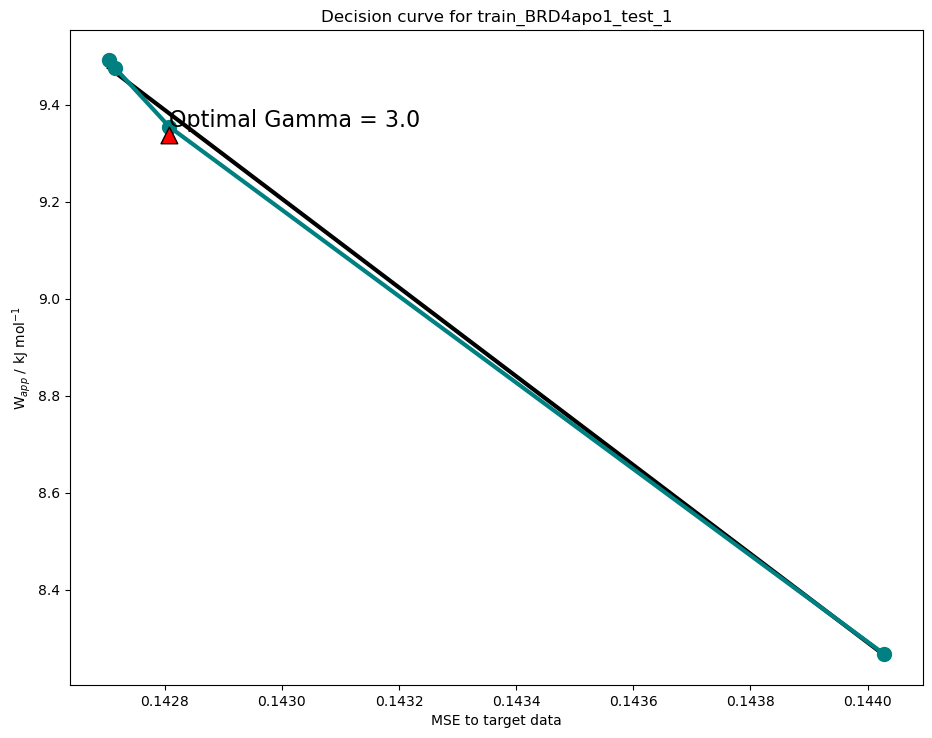

Optimal gamma for train_BRD4apo1_test_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/AvsB_S32/train_BRD4apo1_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 6, len(names) = 6
(47, 7)
   0.0  15.0  60.0  600.0  3600.0  14400.0  peptide
0  0.0   1.0   1.0    1.0     1.0      1.0        0
1  0.0   1.0   1.0    1.0     1.0      1.0        1
2  0.0   1.0   1.0    1.0     1.0      1.0        2
3  0.0   1.0   1.0    1.0     1.0      1.0        3
4  0.0   1.0   1.0    1.0     1.0      1.0        4
    0.0     15.0     60.0    600.0   3600.0  14400.0  peptide
0   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        0
1   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        1
2   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        2
3   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        3
4   0.0  1.00000  1.00000  1.00000  1.00000  1.00000

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_BRD4apo1_test_1
     ResStr  ResEnd  peptide
0         1      26        0
1         5      26        1
2        12      26        2
3        15      26        3
4        27      40        4
..      ...     ...      ...
99      446     453       99
100     453     467      100
101     454     467      101
102     454     477      102
103     468     477      103

[104 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_BRD4apo1_test_1
    ResStr  ResEnd  peptide                                               path
0      365     371       59  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
1      365     381       60  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
2      369     381       61  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
3      372     378       62  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
4      372     381       63  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
5      372     383       64  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
6      382     390       65  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
7      382     392       66  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
8      383     390       67  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
9      384     390       68  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
10     389     399       69  /home/alexi/Documents/ValDX/data/AvsB_S32/val_...
11     389     407

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(101,)
[11.81007957 11.4481684   2.80028637  1.40005147 10.04455772 10.7406717
  6.64133389 10.02717372 17.3662359   9.78985003  5.85764194  6.23947814
  2.48987339  4.89418043  3.84687699 10.12480802  7.67643302  6.19248214
  7.94032414  9.77098433 19.42443995 21.57560224 28.42671335 33.23159378
 24.96401687 21.47448475 23.48405856 25.59960412 10.8085571   4.53738446
 15.34455317 12.23261641  8.43882512 13.99061233 23.15385356 25.70985304
 26.39678786 30.79872831 31.60910004 31.1797047  22.79043832 19.30515906
 16.87686166 16.98332366 14.63735591  8.28989901  3.8611338   3.896768
  3.51071818  9.34954616 12.59243397 14.60283039 12.14875794 12.84512474
 13.9056825  11.80029507  8.65538679 10.7635346   9.3586324  11.44790232
 13.17973413  9.10801623 11.79230976 10.37493528 13.16351065 10.72827192
  2.79418424  9.34170784 10.69057593 12.10196243 14.58438633 13.86889829
 12.4952106  13.91169109 13.54617433 12.13752072 15.87833943 12.84803895
 10.39261401 10.39456953  9.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(257,)
[9.46195967e-08 0.00000000e+00 3.47483376e-01 1.04245002e+00
 2.08490004e+00 3.47483340e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.07633861e-07 1.25895663e-04 1.30091510e-07
 1.13744894e-27 1.07633861e-07 9.73838470e-06 1.31387664e-07
 5.17313755e-29 4.52392812e-10 1.80957125e-09 2.26196406e-09
 4.52392812e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.53771496e-03 3.55238806e-08
 1.10350595e-04 3.50179245e-01 3.51438557e-03 6.97853489e-01
 6.98420680e-01 6.96610197e-01 6.99204867e-01 6.99471978e-01
 1.05170350e+00 2.44713795e+00 5.59244741e+00 3.50388987e+00
 7.69731561e+00 7.35352364e+00 8.04748861e+00 6.97243417e-01
 2.81435212e+00 2.45046768e+00 6.65250922e+00 8.74819328e+00
 1.15454719e+01 1.21488674e+01 1.08497978e+01 1.24970350e+01
 1.11036979e+01 1.07486861e+01 1.21489681e+01 1.28500170e+01
 1.07501973e+01 1.11010941e+01 1.42490465e+01 1.24988428e+01
 8.74734000e+00 9.35322669e+00 1.07479726e+01 1.00477104e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Structures loaded BRD4apo1_test: 
BRD4apo1_test Topology: <Universe with 4155 atoms>
BRD4apo1_test Trajectory: <Universe with 4155 atoms>
BRD4apo1_test Traj: no frames 45
Topology <Universe with 4155 atoms>
Writing train PDB to results/AvsB_S/train_1_AvsB_S_20240228-144033.pdb
Writing val PDB to results/AvsB_S/val_1_AvsB_S_20240228-144033.pdb
Finished running VDX loop
Evaluating HDX
plotting gamma distributions


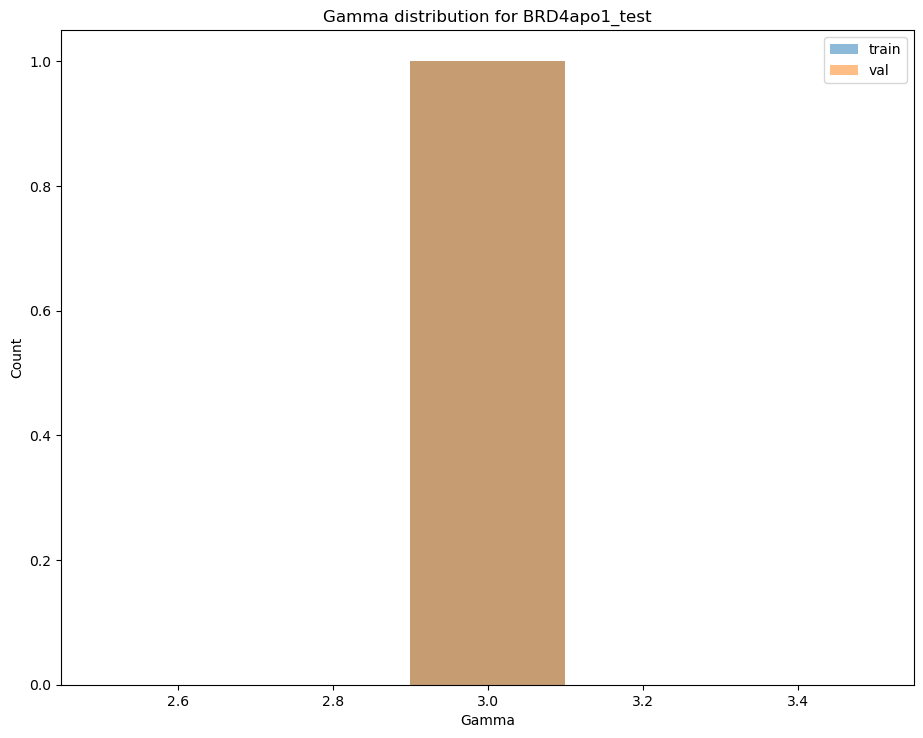

['train_BRD4apo1_test_1']
['val_BRD4apo1_test_1']
plotting dfracs compare for train
plot_dfracs_compare
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
295  0.0  0.483576  0.655002  0.842965  0.897737  0.944061       99   
296  0.0  0.955073  0.996269  1.000000  1.000000  1.000000      100   
297  0.0  0.958192  0.995934  1.000000  1.000000  1.000000      101   
298  0.0  0.972948  0.997369  1.000000  1.000000  1.000000      102   
299  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                calc_name  ResStr  ResEnd p

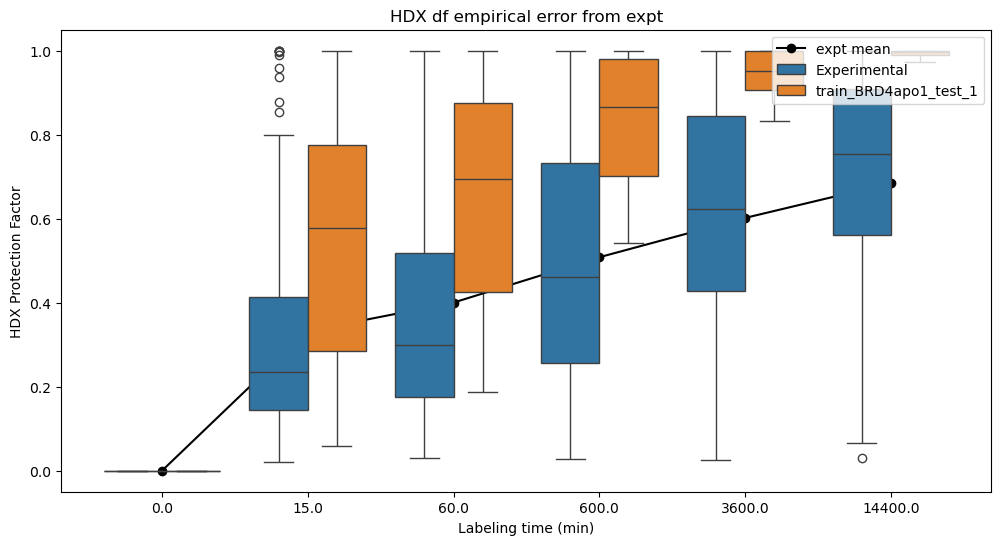

plotting dfracs compare for val
plot_dfracs_compare
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
295  0.0  0.483576  0.655002  0.842965  0.897737  0.944061       99   
296  0.0  0.955073  0.996269  1.000000  1.000000  1.000000      100   
297  0.0  0.958192  0.995934  1.000000  1.000000  1.000000      101   
298  0.0  0.972948  0.997369  1.000000  1.000000  1.000000      102   
299  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                calc_name  ResStr  ResEnd path  
0            Experimental     NaN     NaN  NaN

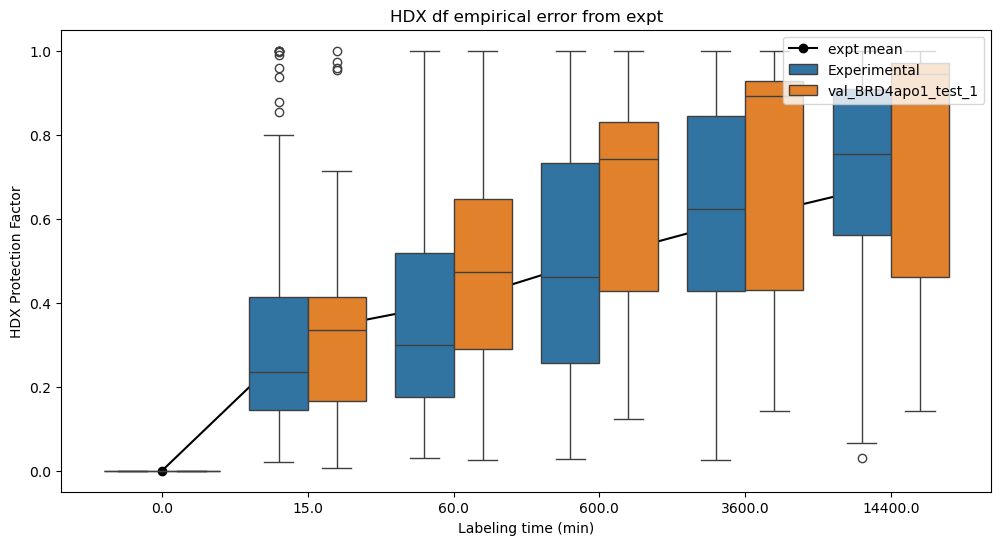

Restoring trainval peptide numbers
train_rep_names ['train_BRD4apo1_test_1']
val_rep_names ['val_BRD4apo1_test_1']
test_rep_names ['test_BRD4apo1_test_1']
train_rep_peptides [0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
val_rep_peptides [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]
manual merg

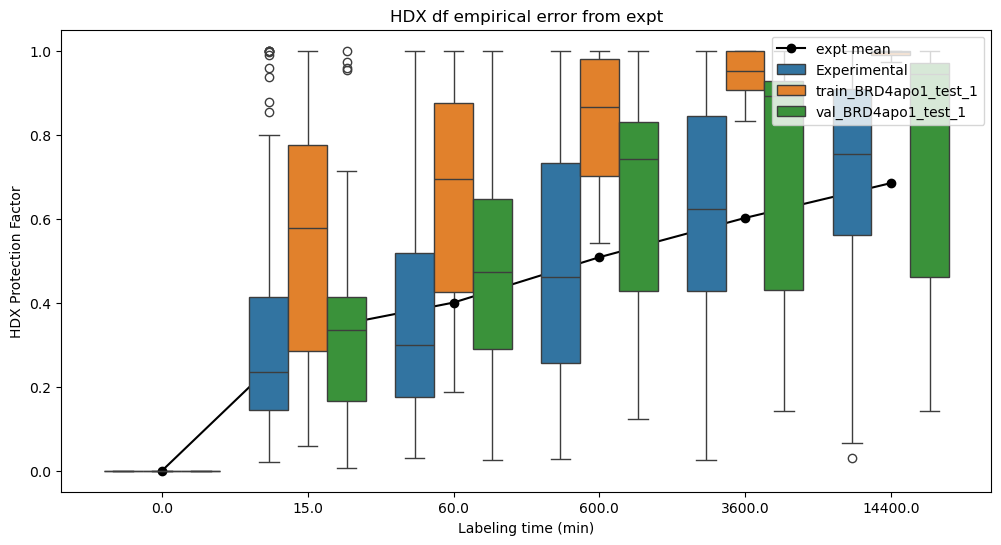

plotting dfracs compare abs for merge_df
plotting paired errors
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
191  0.0  0.483576  0.655002  0.842965  0.897737  0.944061       99   
192  0.0  0.955073  0.996269  1.000000  1.000000  1.000000      100   
193  0.0  0.958192  0.995934  1.000000  1.000000  1.000000      101   
194  0.0  0.972948  0.997369  1.000000  1.000000  1.000000      102   
195  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

               calc_name  ResStr  ResEnd  \
0           Experimental     NaN     Na

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


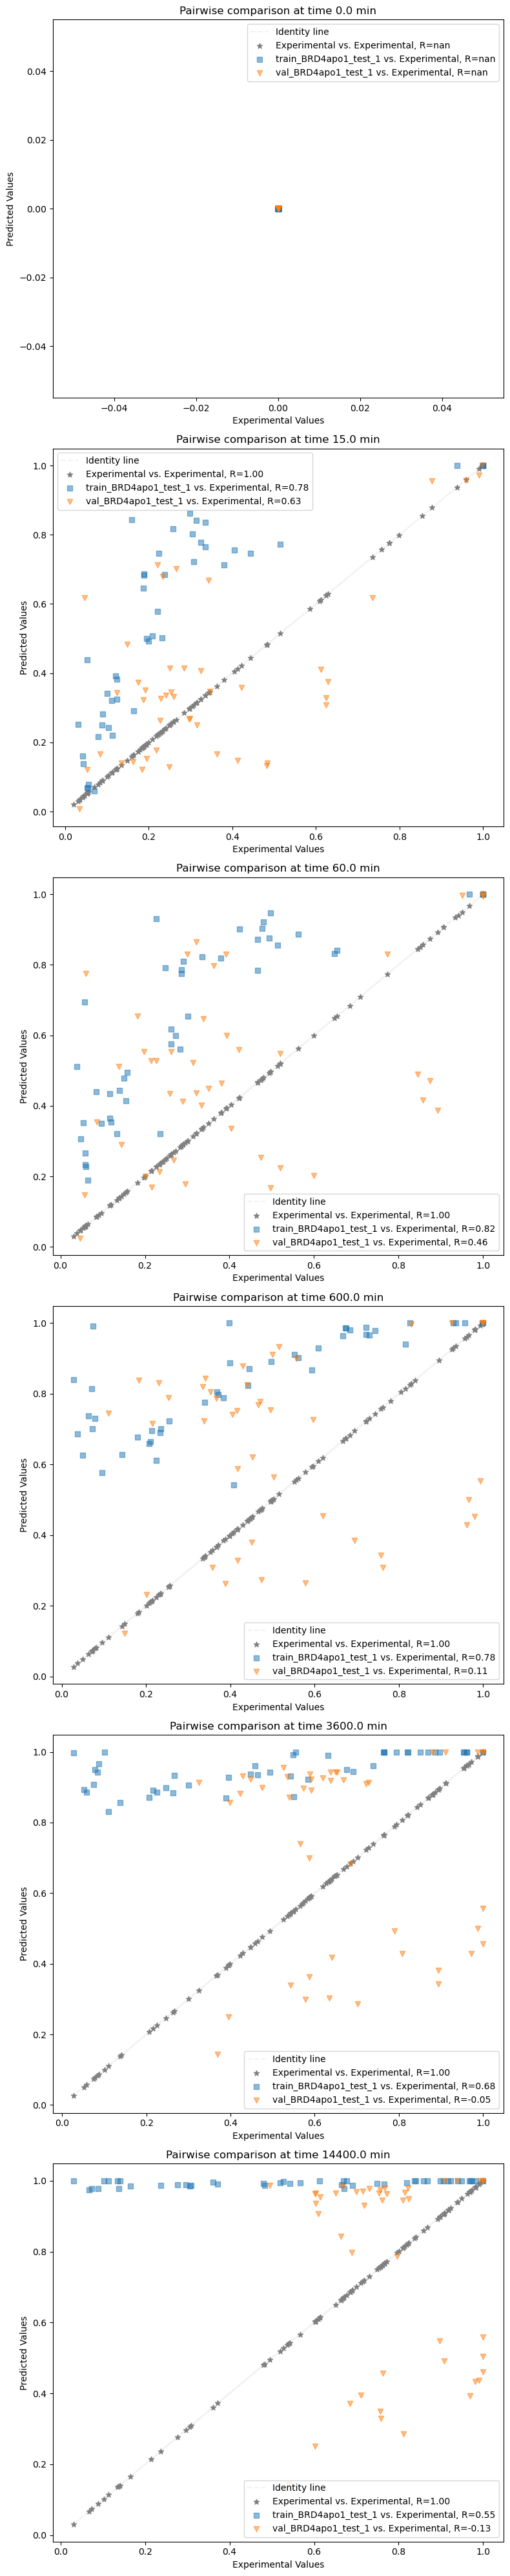

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


plotting R agreement
plotting paired trainval agreement
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
191  0.0  0.483576  0.655002  0.842965  0.897737  0.944061       99   
192  0.0  0.955073  0.996269  1.000000  1.000000  1.000000      100   
193  0.0  0.958192  0.995934  1.000000  1.000000  1.000000      101   
194  0.0  0.972948  0.997369  1.000000  1.000000  1.000000      102   
195  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

               calc_name  ResStr  ResEnd  \
0           Experimental     NaN     NaN   
1  

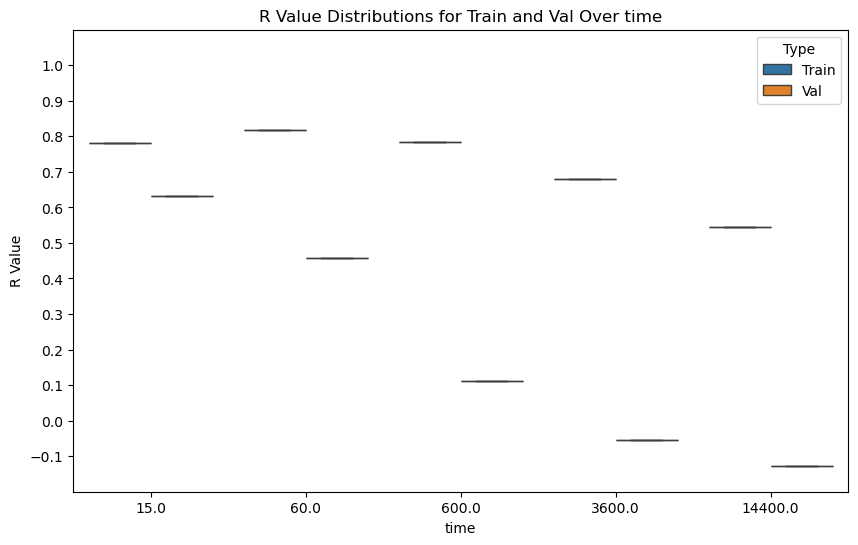

concat plot_df
nan_df
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        0   
1    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        1   
2    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        2   
3    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
179  0.0  0.483576  0.655002  0.842965  0.897737  0.944061       99   
180  0.0  0.955073  0.996269  1.000000  1.000000  1.000000      100   
181  0.0  0.958192  0.995934  1.000000  1.000000  1.000000      101   
182  0.0  0.972948  0.997369  1.000000  1.000000  1.000000      102   
183  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                 calc_name  ResStr  ResEnd  \
0    train_BRD4apo1_test_1     NaN     NaN   
1    train_BRD4apo1_test_1     Na

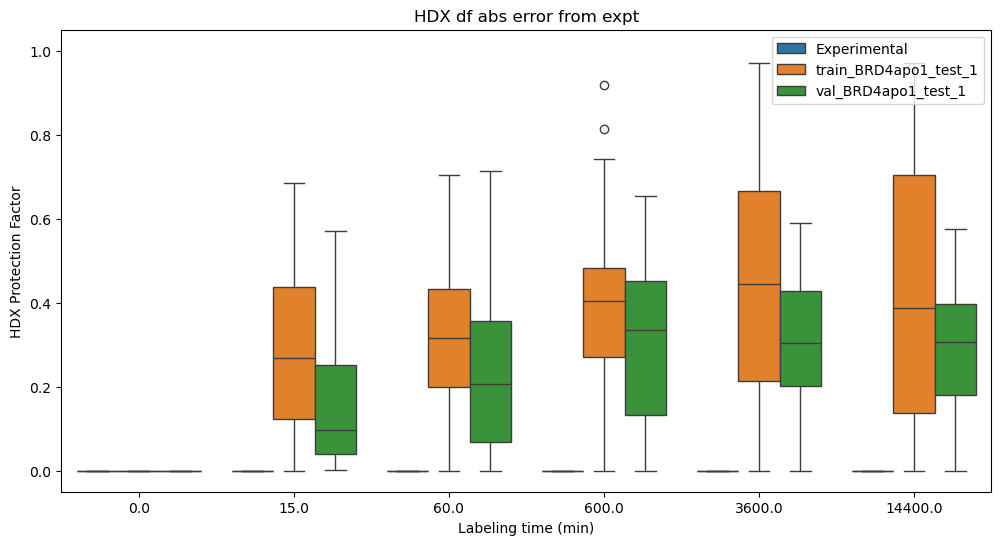

plotting MSE for nan_df
plot_dfracs_compare_MSE
     0.0     15.0     60.0    600.0   3600.0  14400.0  peptide  \
0    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        0   
1    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        1   
2    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        2   
3    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        3   
4    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        4   
..   ...      ...      ...      ...      ...      ...      ...   
283  0.0  0.14815  0.18224  0.34088  0.57321  0.76147       99   
284  0.0  0.87831  0.95006  0.92541  0.91076  0.90876      100   
285  0.0  0.95882  1.00000  0.99768  0.98777  0.99411      101   
286  0.0  0.99006  1.00000  1.00000  1.00000  1.00000      102   
287  0.0  0.99813  1.00000  1.00000  1.00000  1.00000      103   

                 calc_name  ResStr  ResEnd path  
0    train_BRD4apo1_test_1     NaN     NaN  NaN  
1    train_BRD4apo1_test_1     NaN     NaN  NaN  
2    trai

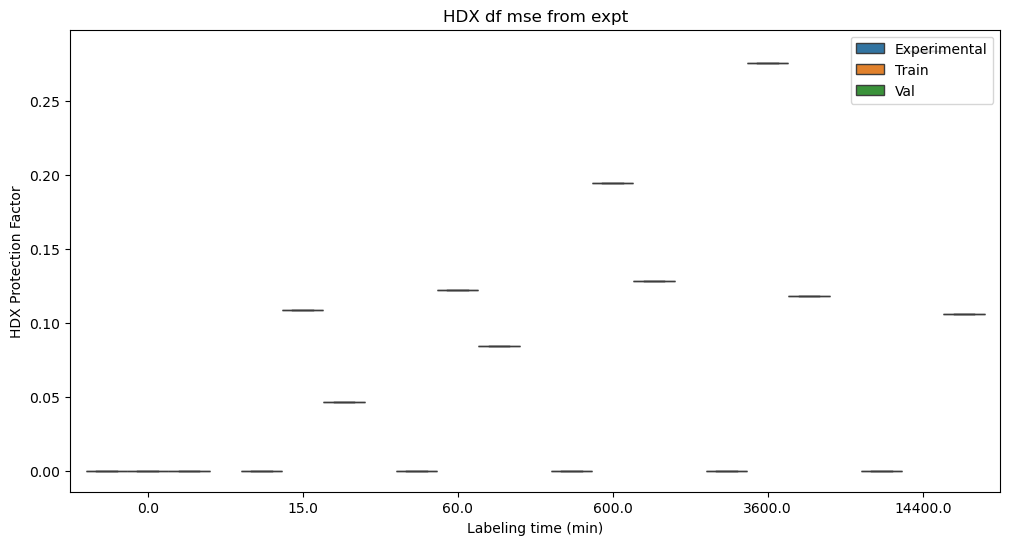

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/AvsB_S32_1709131236.pkl
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Exper

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

train_segs
    ResStr  ResEnd  peptide              calc_name
0        1      26        0  train_BRD4apo1_test_1
1        5      26        1  train_BRD4apo1_test_1
2       12      26        2  train_BRD4apo1_test_1
3       15      26        3  train_BRD4apo1_test_1
59     365     371       59  train_BRD4apo1_test_1
Saved train BRD4apo1_test_1 segments to /home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/train_residue_segs__BRD4apo1_test_.txt
Train Peptide numbers: [  0   1   2   3  59  60  61  62  63  64  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101]
Saved val BRD4apo1_test_1 segments to /home/alexi/Documents/ValDX/data/LvsX_SR9/val_BRD4apo1_test_1/val_residue_segs__BRD4apo1_test_.txt
Val Peptide numbers: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58]
train_HDX_data
  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts read


Hbonds readHbonds read
Hbonds read

Contacts read
Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Segments and experimental dfracs read
Finished reweighting
[(array([5.30163768e-05, 1.90575798e-03, 1.65108452e-03, 1.28868861e-04,
       1.12978767e-05, 2.82734011e-03, 5.00665773e-03, 9.32596385e-07,
       3.74109279e-03, 6.39737260e-03, 7.21670552e-04, 9.89430404e-03,
       6.32333850e-03, 1.25225995e-02, 6.91183973e-09, 3.94564616e-03,
       4.77868886e-03, 5.63393521e-01, 1.99160911e-09, 4.81449120e-03,
       7.8

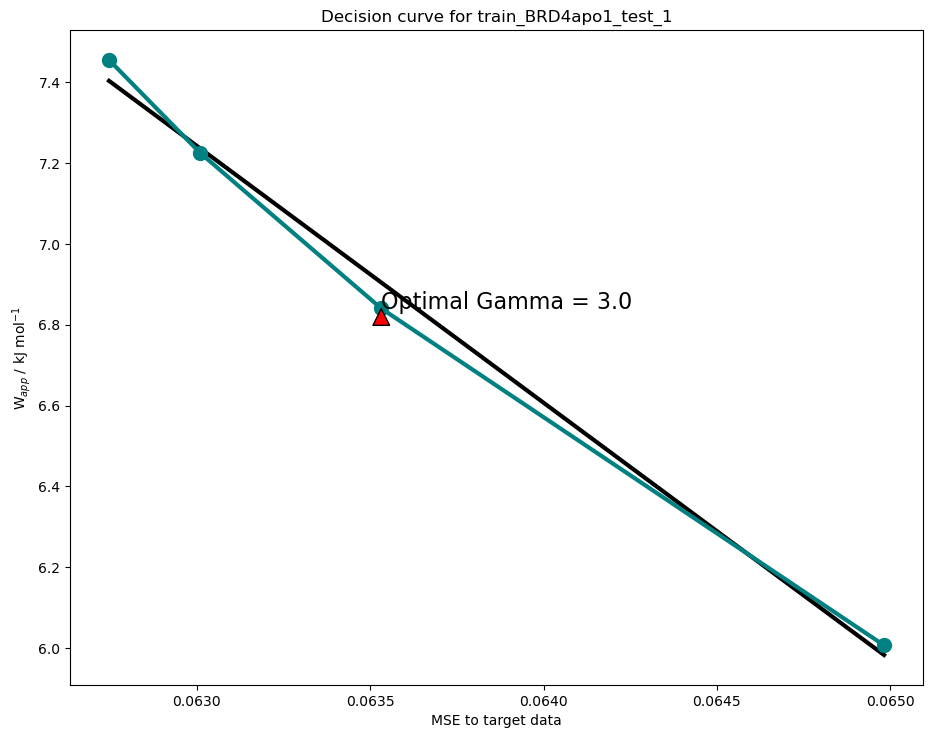

Optimal gamma for train_BRD4apo1_test_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/LvsX_SR9/train_BRD4apo1_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 6, len(names) = 6
(43, 7)
   0.0     15.0     60.0  600.0  3600.0  14400.0  peptide
0  0.0  1.00000  1.00000    1.0     1.0      1.0        0
1  0.0  1.00000  1.00000    1.0     1.0      1.0        1
2  0.0  1.00000  1.00000    1.0     1.0      1.0        2
3  0.0  1.00000  1.00000    1.0     1.0      1.0        3
4  0.0  0.76384  0.95171    1.0     1.0      1.0        4
    0.0     15.0     60.0    600.0   3600.0  14400.0  peptide
0   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        0
1   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        1
2   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        2
3   0.0  1.00000  1.00000  1.00000  1.00000  1.00000        3
4   0.0  0.76384

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_BRD4apo1_test_1
     ResStr  ResEnd  peptide
0         1      26        0
1         5      26        1
2        12      26        2
3        15      26        3
4        27      40        4
..      ...     ...      ...
99      446     453       99
100     453     467      100
101     454     467      101
102     454     477      102
103     468     477      103

[104 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_BRD4apo1_test_1
    ResStr  ResEnd  peptide                                               path
0       41      63        5  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
1       41      65        6  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
2       66      72        7  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
3       68      74        8  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
4       69      78        9  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
5       69      88       10  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
6       69      91       11  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
7       75      91       12  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
8       78      88       13  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
9       78      91       14  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
10      79      88       15  /home/alexi/Documents/ValDX/data/LvsX_SR9/val_...
11      79      91

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(121,)
[ 0.68027432  0.89479292  1.74001143  3.69137468  3.30563632  5.96588307
  5.9083611   7.10118457  0.70019518  3.58038183  2.69493458  7.09499253
  9.1412191  11.7590501  12.37807654 11.68084248 12.56727289 11.29199894
 11.77394222 12.33690547 13.16581361 11.9517688  12.28363876 14.53826192
 12.5811643   9.21507492  9.83763828 10.72941074 10.15649316  5.87334679
  9.2429636   6.74923378  8.40285446 15.20783439  6.50254997  7.13022562
 11.09397606  8.16722329  5.77826423  5.65207279 10.72089376  7.13969037
  5.78884438  6.55081678  7.23661529  8.30250623  5.26362583  9.9953769
  6.47728284  4.32103772  7.04684985 10.87222984  4.13379339  2.22055591
  7.00263629  9.69302867 13.55377119 14.2842426  12.87434978 14.0819857
 11.54405076 11.03326342 15.6031022  14.21675047  8.34074519  6.89630221
  8.62460612 10.65142301  7.33031292  9.52761905  9.17387319 14.39555655
  5.61133089  9.03767235 10.73255881 14.22452633 11.09084851 13.5149952
 14.03838324 13.47317261 12.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(257,)
[3.53711135e-05 0.00000000e+00 2.09311716e-01 6.19432432e-01
 1.23886486e+00 2.06477477e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.39295673e-03 1.80165578e-03 1.79783497e-06
 1.07708384e-07 1.39332247e-03 3.38791531e-04 2.62395304e-03
 1.41557314e-07 4.09076221e-04 1.63616052e-03 2.04466863e-03
 4.08933726e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.48655855e-03 1.76269759e-04
 3.97509773e-03 2.08802350e-01 7.82532956e-03 4.24797336e-01
 6.68578097e-01 6.68669089e-01 6.72210218e-01 6.80274325e-01
 8.94792916e-01 1.74001143e+00 3.69137468e+00 3.30563632e+00
 5.96588307e+00 5.90836110e+00 7.10118457e+00 7.00195183e-01
 3.58038183e+00 2.69493458e+00 7.09499253e+00 9.14121910e+00
 1.17590501e+01 1.23780765e+01 1.16808425e+01 1.25672729e+01
 1.12919989e+01 1.17739422e+01 1.23369055e+01 1.31658136e+01
 1.19517688e+01 1.22836388e+01 1.45382619e+01 1.25811643e+01
 9.21507492e+00 9.83763828e+00 1.07294107e+01 1.01564932e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Structures loaded BRD4apo1_test: 
BRD4apo1_test Topology: <Universe with 4155 atoms>
BRD4apo1_test Trajectory: <Universe with 4155 atoms>
BRD4apo1_test Traj: no frames 45
Topology <Universe with 4155 atoms>
Writing train PDB to results/LvsX_SR/train_1_LvsX_SR_20240228-144142.pdb
Writing val PDB to results/LvsX_SR/val_1_LvsX_SR_20240228-144142.pdb
Finished running VDX loop
Evaluating HDX
plotting gamma distributions


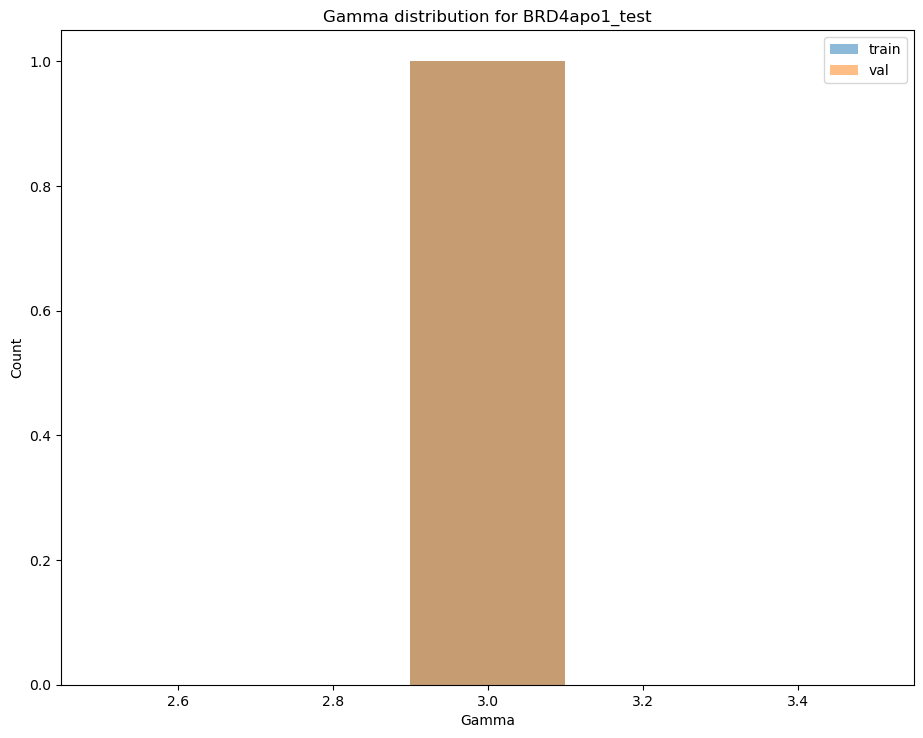

['train_BRD4apo1_test_1']
['val_BRD4apo1_test_1']
plotting dfracs compare for train
plot_dfracs_compare
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
300  0.0  0.039985  0.120696  0.390606  0.755750  0.934474       99   
301  0.0  0.718077  0.762131  0.839581  0.926862  0.989792      100   
302  0.0  0.782897  0.829587  0.899188  0.947069  0.989556      101   
303  0.0  0.859521  0.889733  0.934768  0.965750  0.993242      102   
304  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                calc_name  ResStr  ResEnd p

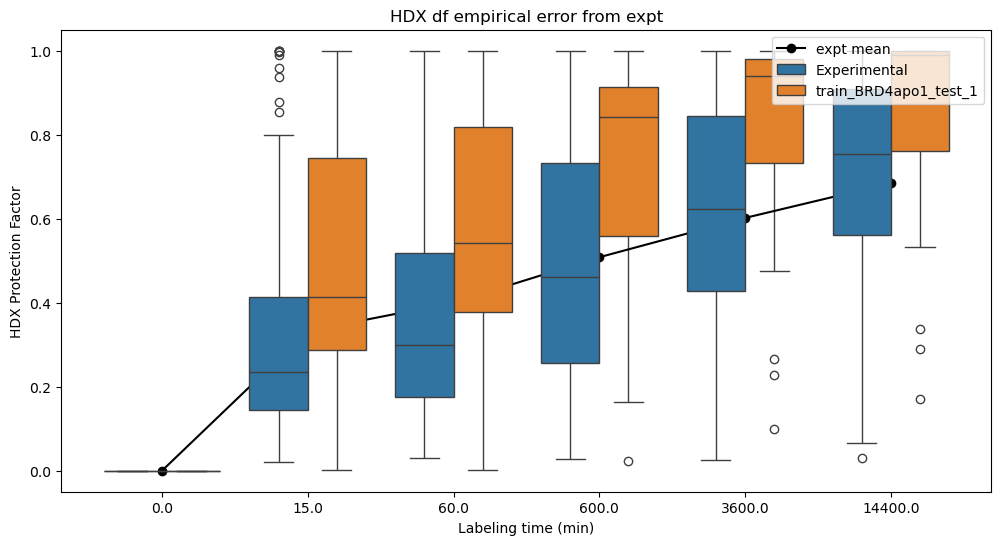

plotting dfracs compare for val
plot_dfracs_compare
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
300  0.0  0.039985  0.120696  0.390606  0.755750  0.934474       99   
301  0.0  0.718077  0.762131  0.839581  0.926862  0.989792      100   
302  0.0  0.782897  0.829587  0.899188  0.947069  0.989556      101   
303  0.0  0.859521  0.889733  0.934768  0.965750  0.993242      102   
304  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                calc_name  ResStr  ResEnd path  
0            Experimental     NaN     NaN  NaN

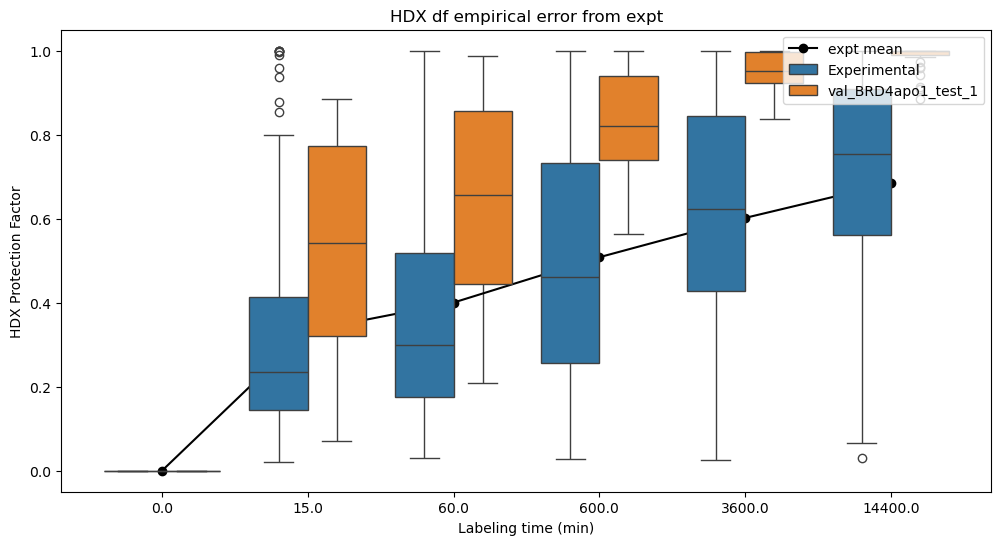

Restoring trainval peptide numbers
train_rep_names ['train_BRD4apo1_test_1']
val_rep_names ['val_BRD4apo1_test_1']
test_rep_names ['test_BRD4apo1_test_1']
train_rep_peptides [0, 1, 2, 3, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
val_rep_peptides [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 10

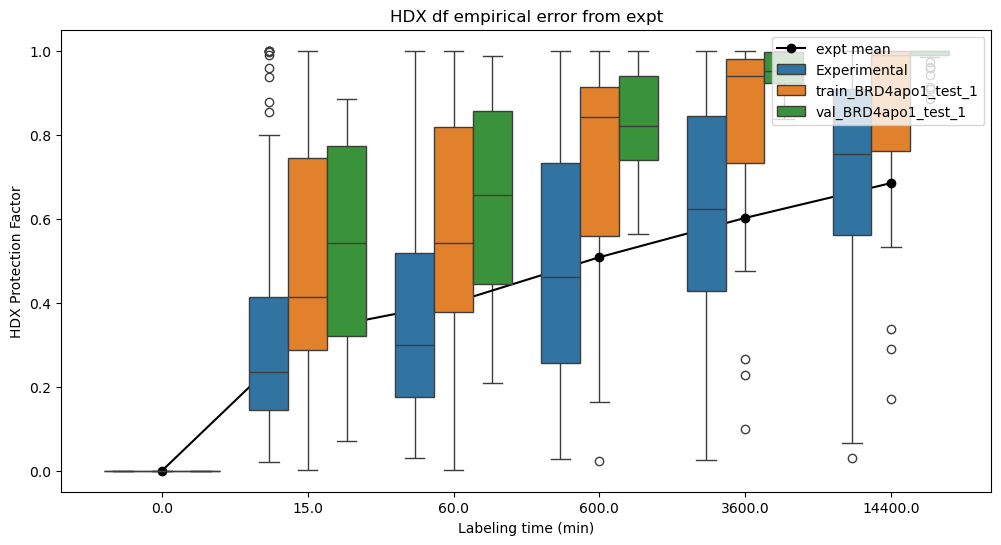

plotting dfracs compare abs for merge_df
plotting paired errors
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
196  0.0  0.444480  0.587521  0.796371  0.861132  0.914569       54   
197  0.0  0.470899  0.610436  0.785037  0.851213  0.908467       55   
198  0.0  0.575903  0.699875  0.802196  0.837567  0.884203       56   
199  0.0  0.666769  0.790614  0.891421  0.918829  0.942244       57   
200  0.0  0.867172  0.987249  1.000000  1.000000  1.000000       58   

               calc_name  ResStr  ResEnd  \
0           Experimental     NaN     Na

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


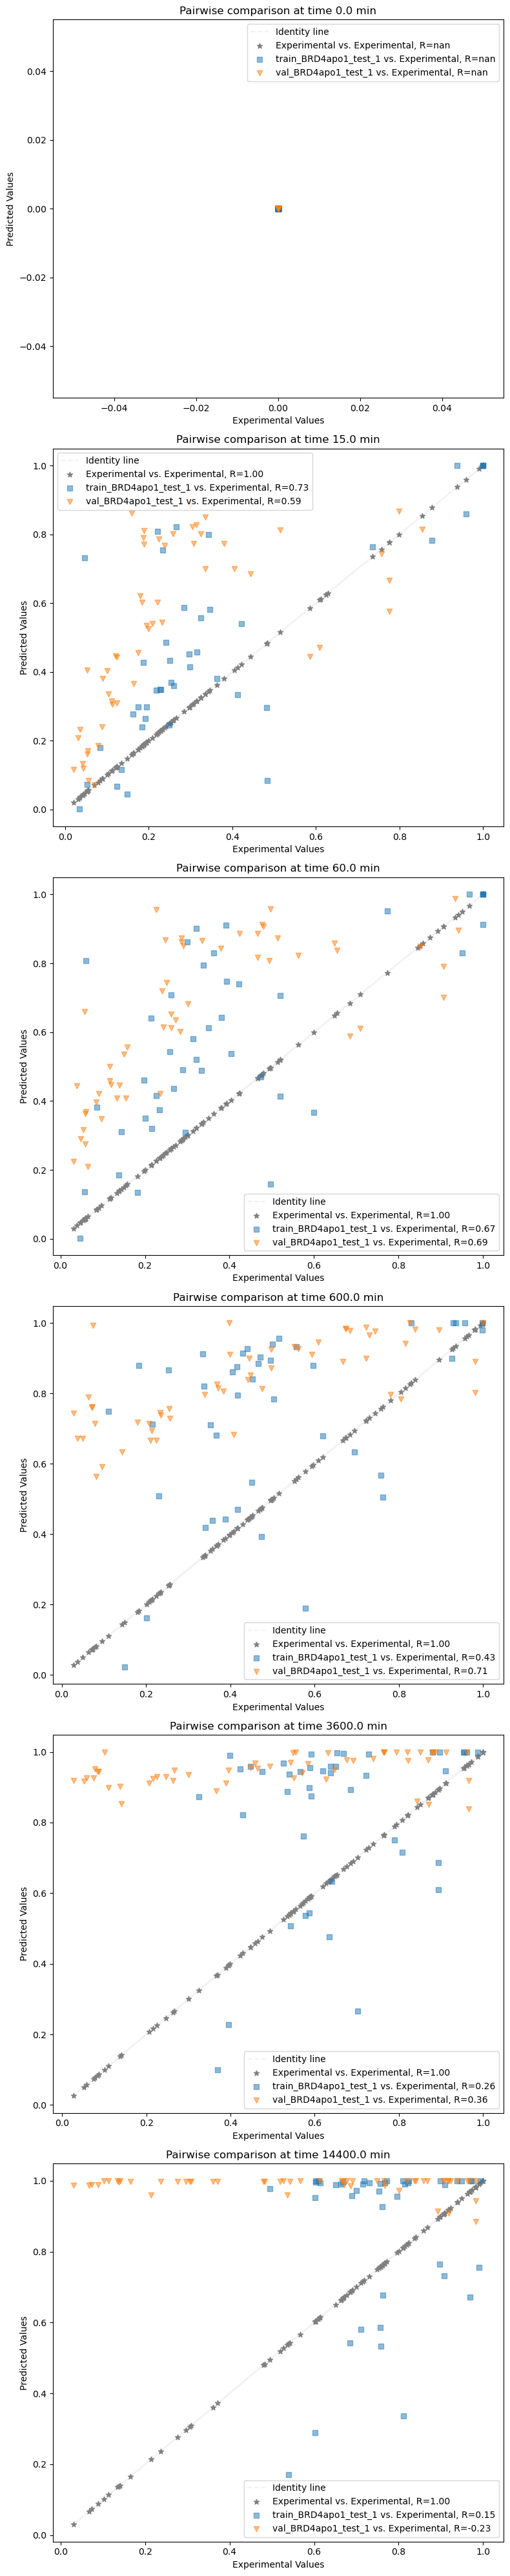

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


plotting R agreement
plotting paired trainval agreement
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
196  0.0  0.444480  0.587521  0.796371  0.861132  0.914569       54   
197  0.0  0.470899  0.610436  0.785037  0.851213  0.908467       55   
198  0.0  0.575903  0.699875  0.802196  0.837567  0.884203       56   
199  0.0  0.666769  0.790614  0.891421  0.918829  0.942244       57   
200  0.0  0.867172  0.987249  1.000000  1.000000  1.000000       58   

               calc_name  ResStr  ResEnd  \
0           Experimental     NaN     NaN   
1  

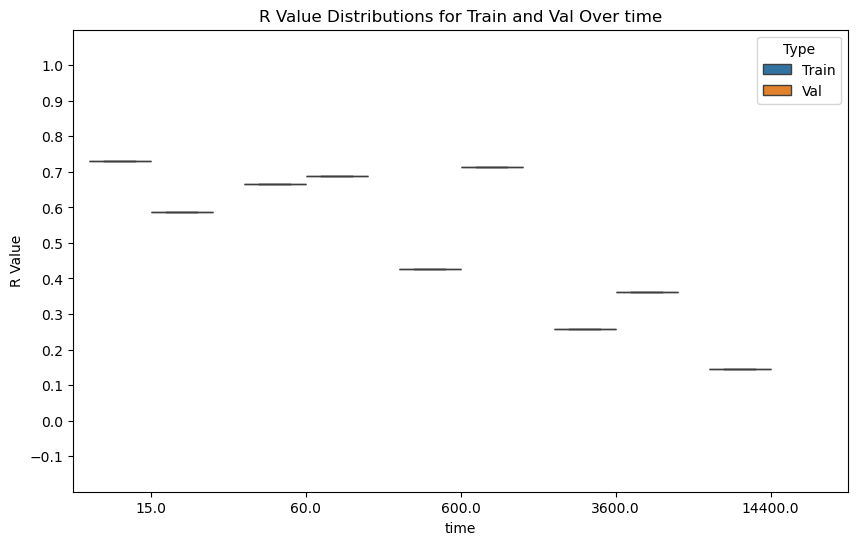

concat plot_df
nan_df
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        0   
1    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        1   
2    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        2   
3    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        3   
4    0.0  0.763840  0.951710  1.000000  1.000000  1.000000       59   
..   ...       ...       ...       ...       ...       ...      ...   
189  0.0  0.444480  0.587521  0.796371  0.861132  0.914569       54   
190  0.0  0.470899  0.610436  0.785037  0.851213  0.908467       55   
191  0.0  0.575903  0.699875  0.802196  0.837567  0.884203       56   
192  0.0  0.666769  0.790614  0.891421  0.918829  0.942244       57   
193  0.0  0.867172  0.987249  1.000000  1.000000  1.000000       58   

                 calc_name  ResStr  ResEnd  \
0    train_BRD4apo1_test_1     NaN     NaN   
1    train_BRD4apo1_test_1     Na

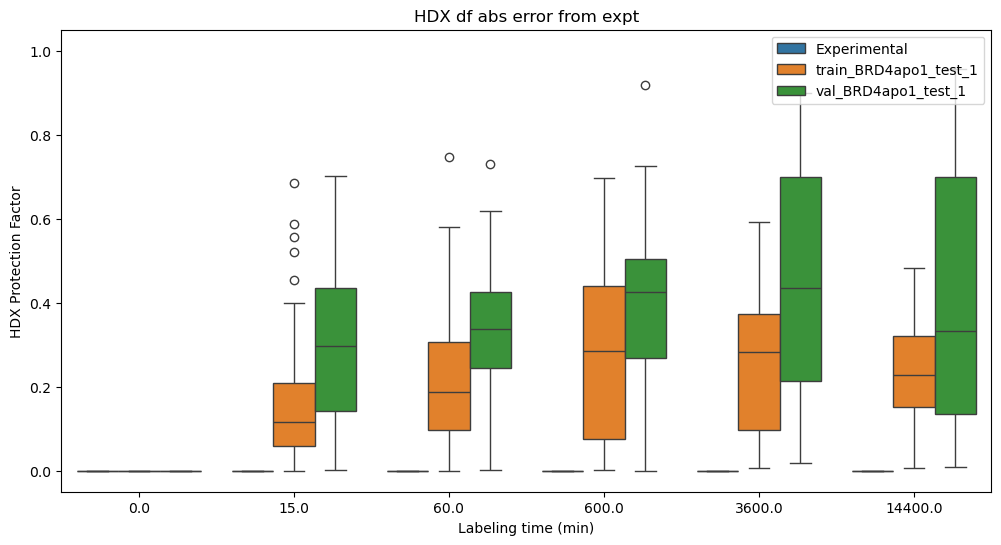

plotting MSE for nan_df
plot_dfracs_compare_MSE
     0.0     15.0     60.0    600.0   3600.0  14400.0  peptide  \
0    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        0   
1    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        1   
2    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        2   
3    0.0  1.00000  1.00000  1.00000  1.00000  1.00000        3   
4    0.0  0.76384  0.95171  1.00000  1.00000  1.00000       59   
..   ...      ...      ...      ...      ...      ...      ...   
293  0.0  0.14815  0.18224  0.34088  0.57321  0.76147       99   
294  0.0  0.87831  0.95006  0.92541  0.91076  0.90876      100   
295  0.0  0.95882  1.00000  0.99768  0.98777  0.99411      101   
296  0.0  0.99006  1.00000  1.00000  1.00000  1.00000      102   
297  0.0  0.99813  1.00000  1.00000  1.00000  1.00000      103   

                 calc_name  ResStr  ResEnd path  
0    train_BRD4apo1_test_1     NaN     NaN  NaN  
1    train_BRD4apo1_test_1     NaN     NaN  NaN  
2    trai

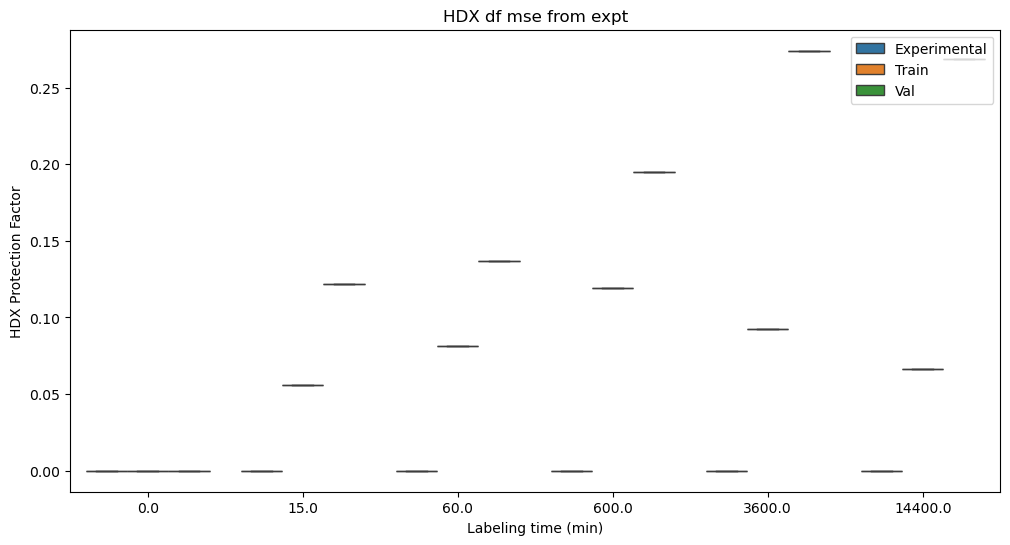

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/LvsX_SR9_1709131305.pkl
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Exper

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/mixAandB_Sp8/train_BRD4apo1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/mixAandB_Sp8/train_BRD4apo1_test_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/mixAandB_Sp8/train_BRD4apo1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/mixAandB_Sp8/train_BRD4apo1_test_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds read
Hbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read

Segments and experimental dfracs read
Finished reweighting
[(array([1.65653888e-05, 1.10129960e-03, 4.93403753e-06, 4.67856409e-06,
       4.42884590e-21, 4.03677076e-07, 1.65986808e-05, 1.70031658e-21,
       2.26841132e-07, 1.20340232e-05, 6.20263610e-04, 7.19590437e-09,
       4.67326018e-06, 3.15749292e-08, 3.46524619e-25, 7.26895613e-03,
       2.11339801e-03, 9.69481945e-01, 1.85161243e-30, 3.37219157

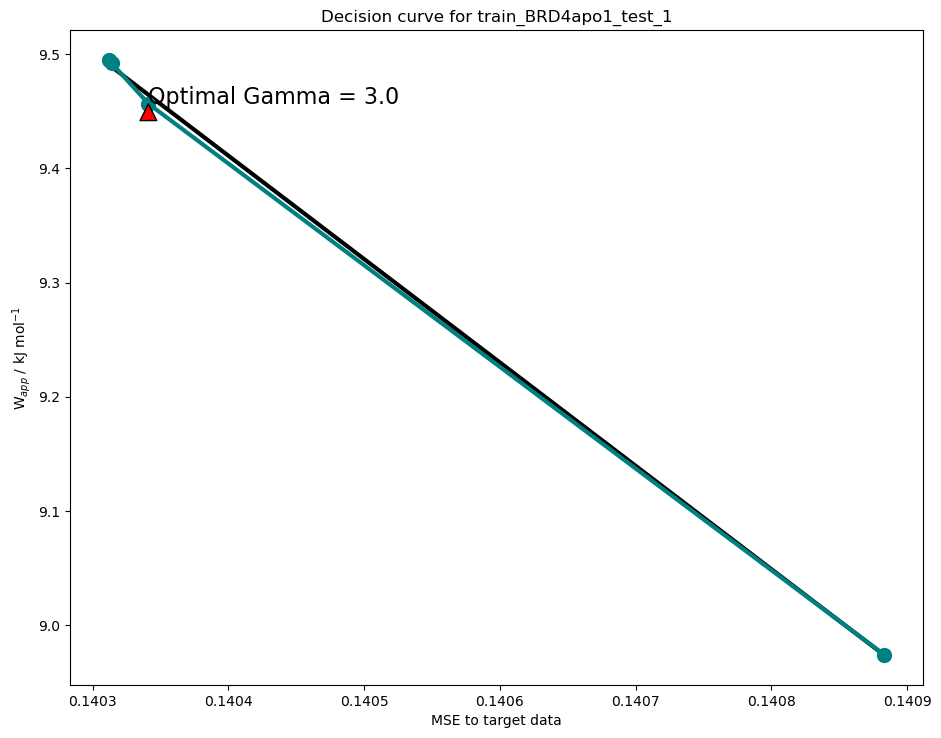

Optimal gamma for train_BRD4apo1_test_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/mixAandB_Sp8/train_BRD4apo1_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/mixAandB_Sp8/train_BRD4apo1_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 6, len(names) = 6
(54, 7)
   0.0     15.0     60.0    600.0   3600.0  14400.0  peptide
0  0.0  0.77603  0.83461  0.97594  0.99995  1.00000        0
1  0.0  0.71629  0.81444  0.97860  0.99995  1.00000        1
2  0.0  0.19838  0.35118  0.62331  0.86079  0.96970        2
3  0.0  0.32020  0.47786  0.74371  0.88470  0.96977        3
4  0.0  0.49798  0.67621  0.83159  0.92313  0.97985        4
    0.0     15.0     60.0    600.0   3600.0  14400.0  peptide
0   0.0  0.77603  0.83461  0.97594  0.99995  1.00000        0
1   0.0  0.71629  0.81444  0.97860  0.99995  1.00000        1
2   0.0  0.19838  0.35118  0.62331  0.86079  0.96970        2
3   0.0  0.32020  0.47786  0.74371  0.88470  0.96977

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_BRD4apo1_test_1
     ResStr  ResEnd  peptide
0         1      26        0
1         5      26        1
2        12      26        2
3        15      26        3
4        27      40        4
..      ...     ...      ...
99      446     453       99
100     453     467      100
101     454     467      101
102     454     477      102
103     468     477      103

[104 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_BRD4apo1_test_1
    ResStr  ResEnd  peptide                                               path
0        1      26        0  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
1        5      26        1  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
2       12      26        2  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
3       15      26        3  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
4      365     371       59  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
5      365     381       60  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
6      369     381       61  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
7      372     378       62  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
8      372     381       63  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
9      372     383       64  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
10     389     399       69  /home/alexi/Documents/ValDX/data/mixAandB_Sp8/...
11     389     407

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(105,)
[7.79336460e-09 0.00000000e+00 3.49417905e-01 1.04825370e+00
 2.09650741e+00 3.49417901e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.37843903e-08 3.52353807e-05 4.40353447e-08
 1.10022096e-30 1.37843903e-08 1.05571252e-06 1.70739009e-08
 1.01294585e-31 3.13500965e-12 1.25400386e-11 1.56750483e-11
 3.13500965e-12 0.00000000e+00 0.00000000e+00 1.18009039e+01
 1.14491990e+01 2.80001313e+00 1.39984104e+00 1.00487728e+01
 1.07477826e+01 6.64774120e+00 1.00439316e+01 1.73906709e+01
 9.79716140e+00 5.85059973e+00 6.20658468e+00 2.45700908e+00
 4.89838135e+00 3.85009244e+00 1.01446430e+01 7.69473440e+00
 2.85606673e+01 3.33607697e+01 2.50684486e+01 2.15722384e+01
 2.35728277e+01 2.56751554e+01 1.08396374e+01 4.54626371e+00
 1.53866645e+01 1.22448264e+01 8.40449672e+00 1.39933483e+01
 2.32254070e+01 2.57779423e+01 2.64751452e+01 3.09147548e+01
 3.17174075e+01 3.12720233e+01 2.28746115e+01 1.93780556e+01
 1.69318900e+01 1.70343249e+01 1.46856531e+01 8.29717432e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(257,)
[7.79336460e-09 0.00000000e+00 3.49417905e-01 1.04825370e+00
 2.09650741e+00 3.49417901e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.37843903e-08 3.52353807e-05 4.40353447e-08
 1.10022096e-30 1.37843903e-08 1.05571252e-06 1.70739009e-08
 1.01294585e-31 3.13500965e-12 1.25400386e-11 1.56750483e-11
 3.13500965e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.66939749e-04 3.53434423e-09
 1.55002316e-05 3.49905119e-01 5.91131159e-04 6.99368804e-01
 6.99802022e-01 6.99450291e-01 6.99820365e-01 6.99914085e-01
 1.05013235e+00 2.44877594e+00 5.59641833e+00 3.50048276e+00
 7.69761544e+00 7.34897339e+00 8.04842252e+00 6.99579629e-01
 2.80334133e+00 2.45051073e+00 6.65108501e+00 8.75048870e+00
 1.15497316e+01 1.21502473e+01 1.08512545e+01 1.24999967e+01
 1.11009548e+01 1.07510887e+01 1.21501214e+01 1.28504953e+01
 1.07516675e+01 1.11017871e+01 1.42503818e+01 1.25000164e+01
 8.75028330e+00 9.35132166e+00 1.07496828e+01 1.00497825e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Structures loaded BRD4apo1_test: 
BRD4apo1_test Topology: <Universe with 4155 atoms>
BRD4apo1_test Trajectory: <Universe with 4155 atoms>
BRD4apo1_test Traj: no frames 45
Topology <Universe with 4155 atoms>
Writing train PDB to results/mixAandB_Sp/train_1_mixAandB_Sp_20240228-144308.pdb
Writing val PDB to results/mixAandB_Sp/val_1_mixAandB_Sp_20240228-144308.pdb
Finished running VDX loop
Evaluating HDX
plotting gamma distributions


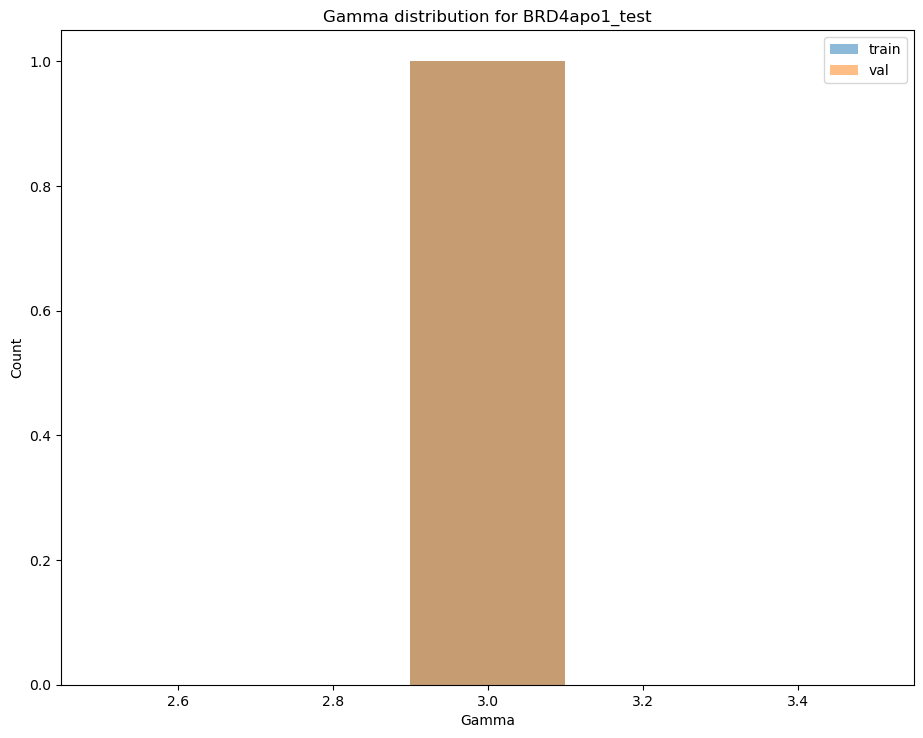

['train_BRD4apo1_test_1']
['val_BRD4apo1_test_1']
plotting dfracs compare for train
plot_dfracs_compare
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
291  0.0  0.483065  0.654764  0.842615  0.897412  0.943348       99   
292  0.0  0.955062  0.996266  1.000000  1.000000  1.000000      100   
293  0.0  0.958184  0.995930  1.000000  1.000000  1.000000      101   
294  0.0  0.972942  0.997367  1.000000  1.000000  1.000000      102   
295  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                calc_name  ResStr  ResEnd p

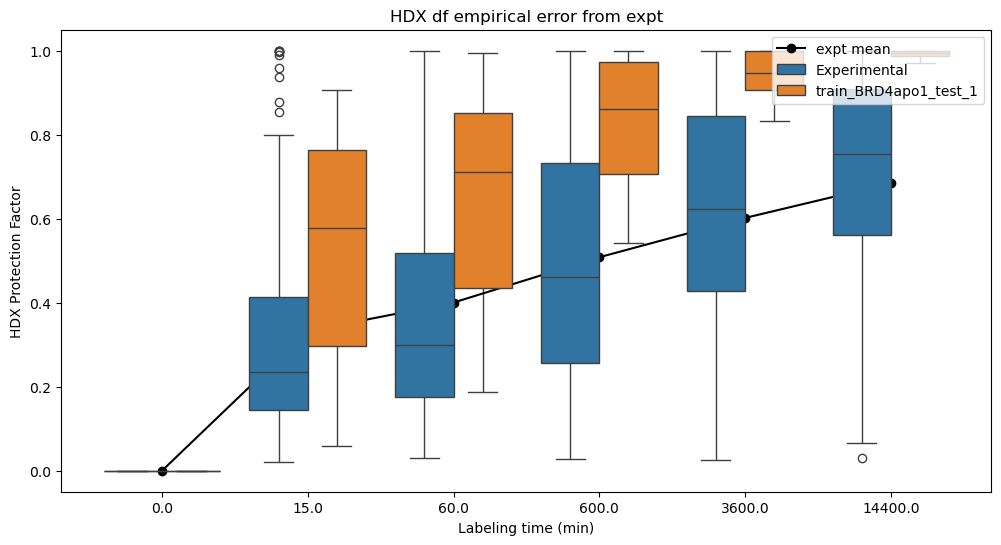

plotting dfracs compare for val
plot_dfracs_compare
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
291  0.0  0.483065  0.654764  0.842615  0.897412  0.943348       99   
292  0.0  0.955062  0.996266  1.000000  1.000000  1.000000      100   
293  0.0  0.958184  0.995930  1.000000  1.000000  1.000000      101   
294  0.0  0.972942  0.997367  1.000000  1.000000  1.000000      102   
295  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                calc_name  ResStr  ResEnd path  
0            Experimental     NaN     NaN  NaN

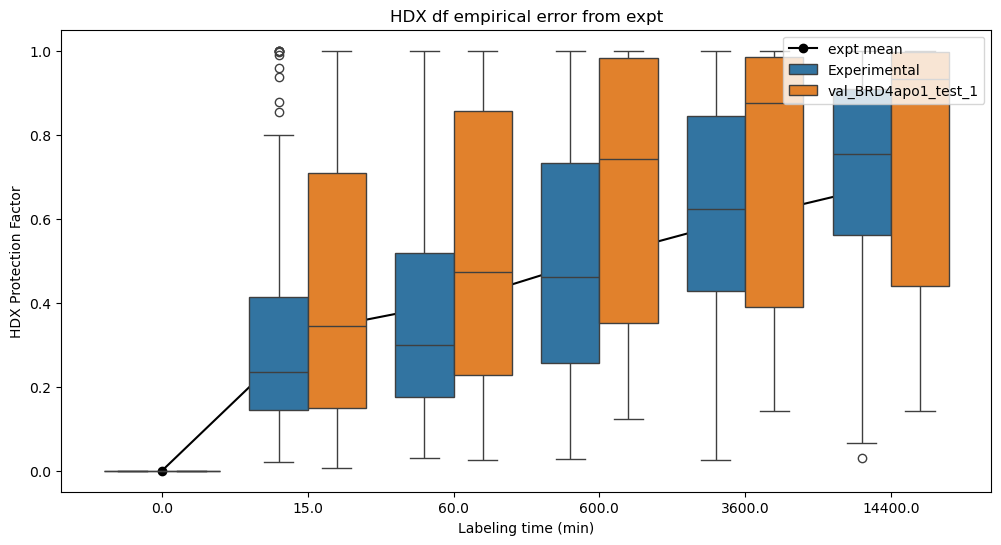

Restoring trainval peptide numbers
train_rep_names ['train_BRD4apo1_test_1']
val_rep_names ['val_BRD4apo1_test_1']
test_rep_names ['test_BRD4apo1_test_1']
train_rep_peptides [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
val_rep_peptides [0, 1, 2, 3, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 97, 98, 99, 100, 101, 102, 103]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]
manual merge df
    0.0      15

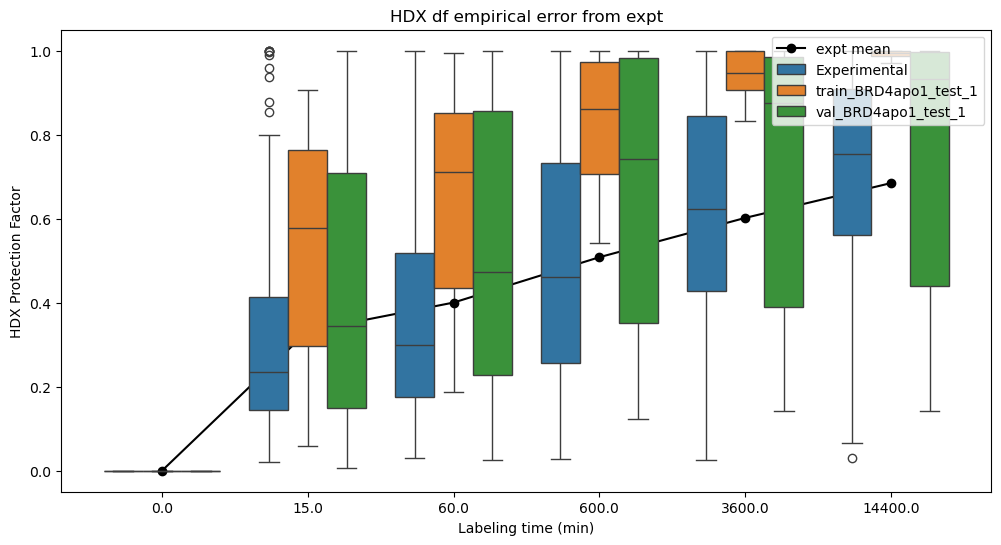

plotting dfracs compare abs for merge_df
plotting paired errors
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
187  0.0  0.483065  0.654764  0.842615  0.897412  0.943348       99   
188  0.0  0.955062  0.996266  1.000000  1.000000  1.000000      100   
189  0.0  0.958184  0.995930  1.000000  1.000000  1.000000      101   
190  0.0  0.972942  0.997367  1.000000  1.000000  1.000000      102   
191  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

               calc_name  ResStr  ResEnd  \
0           Experimental     NaN     Na

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


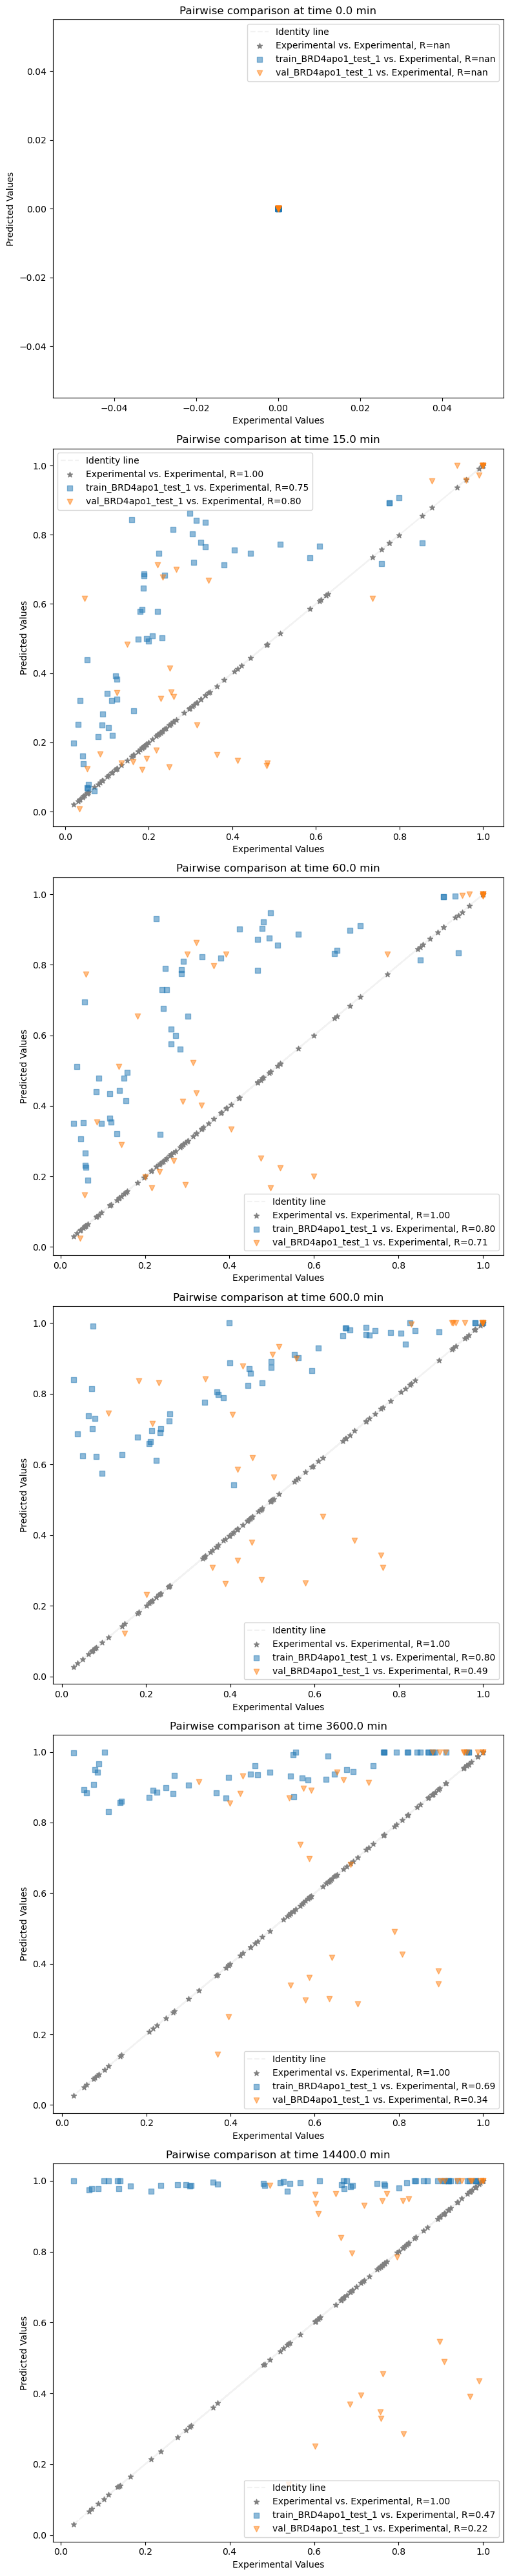

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


plotting R agreement
plotting paired trainval agreement
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  1.000000  1.000000  0.956870  0.961950  0.974370        0   
1    0.0  1.000000  1.000000  0.934720  0.896640  0.898610        1   
2    0.0  1.000000  1.000000  0.998070  0.954280  0.949890        2   
3    0.0  0.937360  0.966910  0.928830  0.954830  0.969860        3   
4    0.0  1.000000  1.000000  1.000000  1.000000  1.000000        4   
..   ...       ...       ...       ...       ...       ...      ...   
187  0.0  0.483065  0.654764  0.842615  0.897412  0.943348       99   
188  0.0  0.955062  0.996266  1.000000  1.000000  1.000000      100   
189  0.0  0.958184  0.995930  1.000000  1.000000  1.000000      101   
190  0.0  0.972942  0.997367  1.000000  1.000000  1.000000      102   
191  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

               calc_name  ResStr  ResEnd  \
0           Experimental     NaN     NaN   
1  

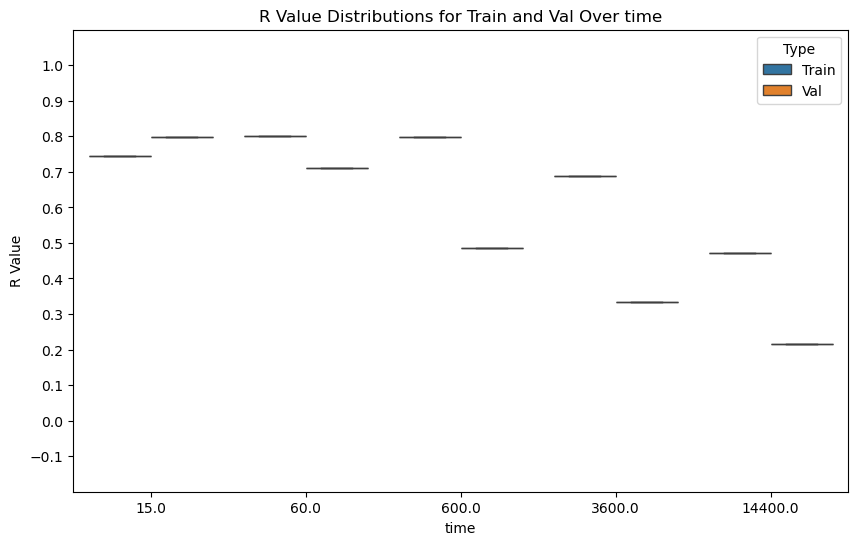

concat plot_df
nan_df
     0.0      15.0      60.0     600.0    3600.0   14400.0  peptide  \
0    0.0  0.776030  0.834610  0.975940  0.999950  1.000000        5   
1    0.0  0.716290  0.814440  0.978600  0.999950  1.000000        6   
2    0.0  0.198380  0.351180  0.623310  0.860790  0.969700        7   
3    0.0  0.320200  0.477860  0.743710  0.884700  0.969770        8   
4    0.0  0.497980  0.676210  0.831590  0.923130  0.979850        9   
..   ...       ...       ...       ...       ...       ...      ...   
171  0.0  0.483065  0.654764  0.842615  0.897412  0.943348       99   
172  0.0  0.955062  0.996266  1.000000  1.000000  1.000000      100   
173  0.0  0.958184  0.995930  1.000000  1.000000  1.000000      101   
174  0.0  0.972942  0.997367  1.000000  1.000000  1.000000      102   
175  0.0  1.000000  1.000000  1.000000  1.000000  1.000000      103   

                 calc_name  ResStr  ResEnd  \
0    train_BRD4apo1_test_1     NaN     NaN   
1    train_BRD4apo1_test_1     Na

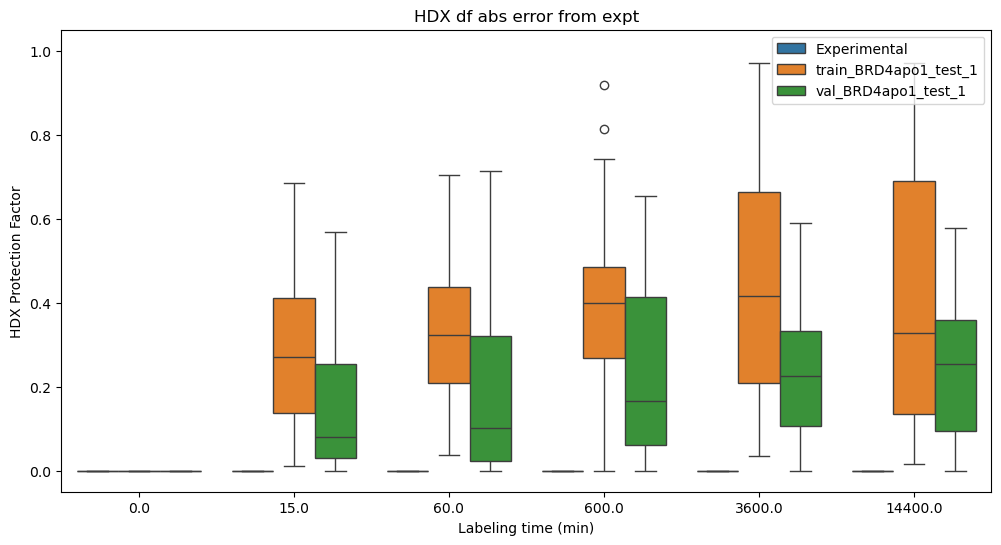

plotting MSE for nan_df
plot_dfracs_compare_MSE
     0.0     15.0     60.0    600.0   3600.0  14400.0  peptide  \
0    0.0  0.77603  0.83461  0.97594  0.99995  1.00000        5   
1    0.0  0.71629  0.81444  0.97860  0.99995  1.00000        6   
2    0.0  0.19838  0.35118  0.62331  0.86079  0.96970        7   
3    0.0  0.32020  0.47786  0.74371  0.88470  0.96977        8   
4    0.0  0.49798  0.67621  0.83159  0.92313  0.97985        9   
..   ...      ...      ...      ...      ...      ...      ...   
275  0.0  0.14815  0.18224  0.34088  0.57321  0.76147       99   
276  0.0  0.87831  0.95006  0.92541  0.91076  0.90876      100   
277  0.0  0.95882  1.00000  0.99768  0.98777  0.99411      101   
278  0.0  0.99006  1.00000  1.00000  1.00000  1.00000      102   
279  0.0  0.99813  1.00000  1.00000  1.00000  1.00000      103   

                 calc_name  ResStr  ResEnd path  
0    train_BRD4apo1_test_1     NaN     NaN  NaN  
1    train_BRD4apo1_test_1     NaN     NaN  NaN  
2    trai

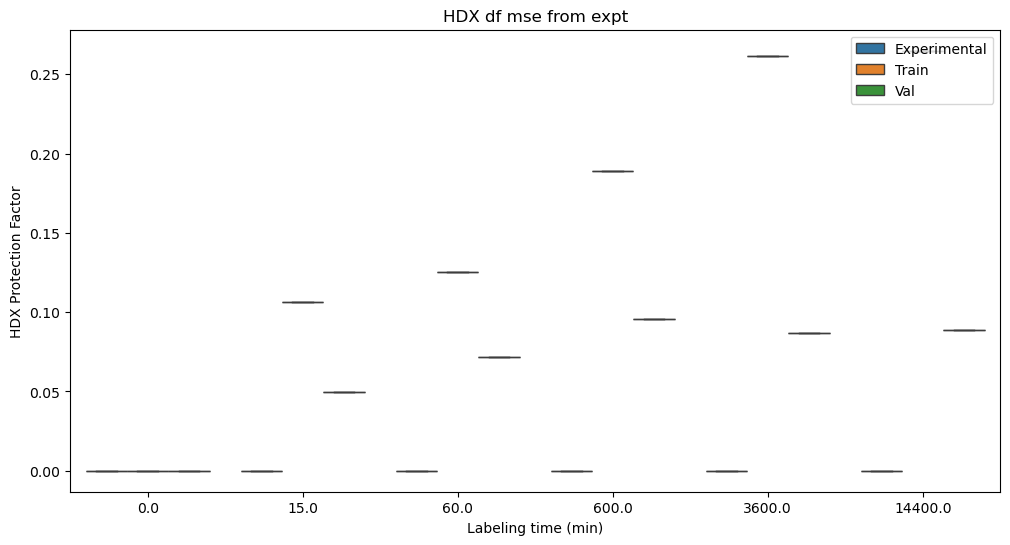

Saving experiment to:  logs/mixAandB_Sp8_1709131391.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [62]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []

pr = cProfile.Profile()
pr.enable()


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)

pr.disable()
ps = pstats.Stats(pr).sort_stats('cumulative')


In [63]:
ps = pstats.Stats(pr).sort_stats('cumulative')
ps.print_stats()

         30099889 function calls (29568428 primitive calls) in 239.850 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000  239.855  119.927 /home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3472(run_code)
        2    0.000    0.000  239.855  119.927 {built-in method builtins.exec}
        1    0.000    0.000  239.855  239.855 /tmp/ipykernel_215014/742124640.py:15(<module>)
        3    0.000    0.000  239.853   79.951 /tmp/ipykernel_215014/853554474.py:1(run_split_test)
        3    0.000    0.000  236.854   78.951 /home/alexi/Documents/ValDX/ValDX/ValidationDX.py:597(run_VDX)
        3    0.000    0.000  148.239   49.413 /home/alexi/Documents/ValDX/ValDX/ValidationDX.py:673(train_HDX)
     5236  142.140    0.027  142.140    0.027 {method 'acquire' of '_thread.lock' objects}
      780    0.004    0.000  141.891    0.182 /home/alexi/anaconda3/envs/HD

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


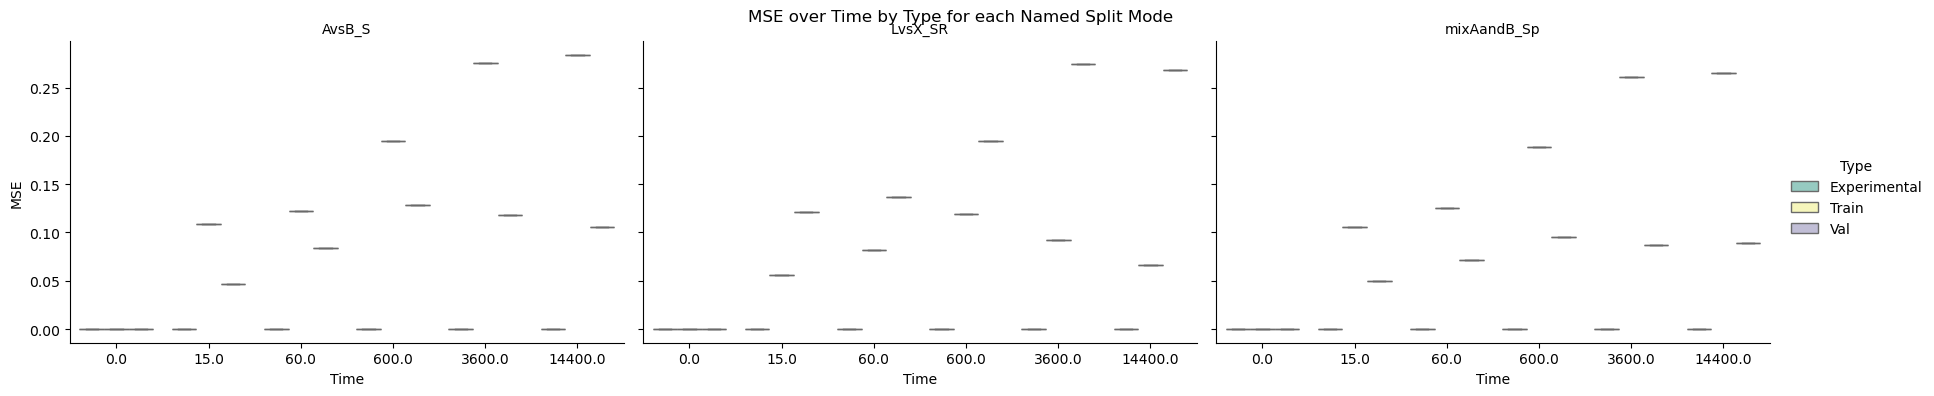

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


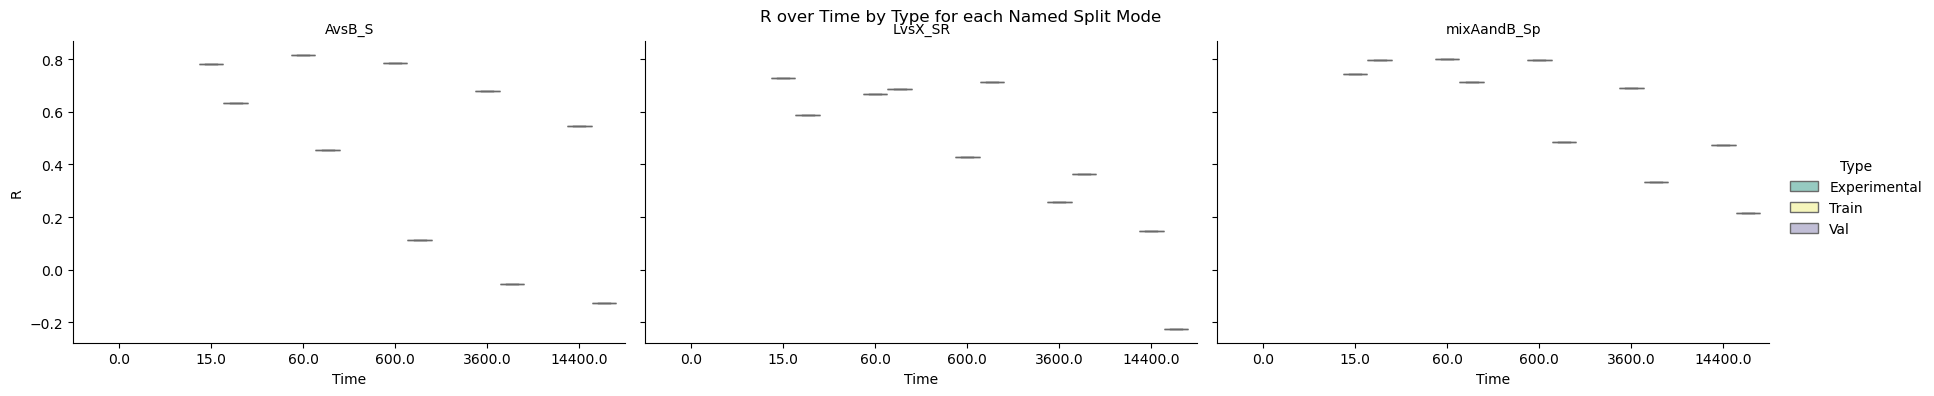

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf  \
0  [9.46195966523599e-08, 0.0, 0.3474833764348352...   
1  [0.03888888888888889, 0.0, 0.02333333333333333...   
2  [11.810079571145488, 11.448168395988198, 2.800...   
3  [9.46195966523599e-08, 0.0, 0.3474833764348352...   
0  [3.537111349121258e-05, 0.0, 0.209311715549231...   
1  [0.03888888888888889, 0.0, 0.02333333333333333...   
2  [0.6802743245668219, 0.8947929163997181, 1.740...   
3  [3.537111349121258e-05, 0.0, 0.209311715549231...   
0  [0.6999140846895217, 1.0501323471686763, 2.448...   
1  [0.03888888888888889, 0.0, 0.02333333333333333...   
2  [7.793364602866008e-09, 0.0, 0.349417904533897...   
3  [7.793364602866008e-09, 0.0, 0.349417904533897...   

                   calc_name  \
0      train_BRD4apo1_test_1   
1  no_weight_BRD4apo1_test_1   
2        val_BRD4apo1_test_1   
3       test_BRD4apo1_test_1   
0      train_BRD4apo1_test_1   
1  no_weight_BRD4apo1_test_1   
2        val_BRD4apo1_test_1   
3       test_BR

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

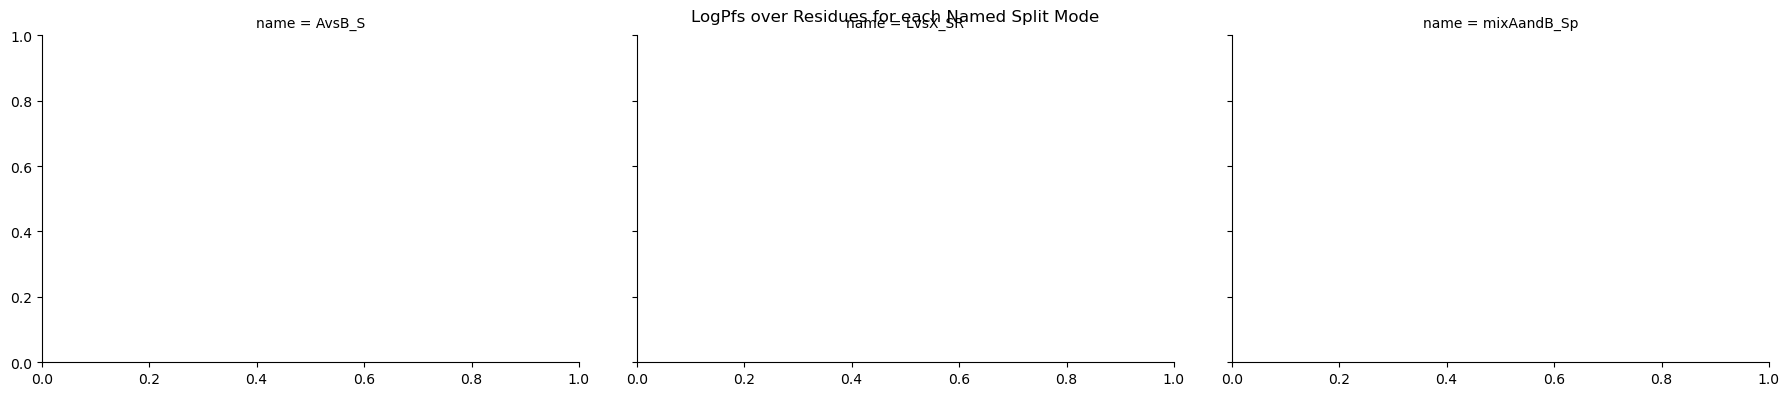

In [66]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

